<a href="https://colab.research.google.com/github/adhalya/data_visualization/blob/main/Exerc%C3%ADcio_Pr%C3%A1tico_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Desafio Prático 1: Visualizando Dados Diferentes

Este desafio tem por objetivo criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências. Para isto, será utilizado o arquivo *saude.csv*.


**Dicionário de Dados:**

- **id:** Identificador do paciente
- **age:** Idade do paciente
- **height:** Altura do paciente
- **weight:** Peso do paciente
- **gender:** Gênero do paciente



In [ ]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/adhalya/data_visualization/main/Arquivos%20de%20Dados/saude.csv')
df_1.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


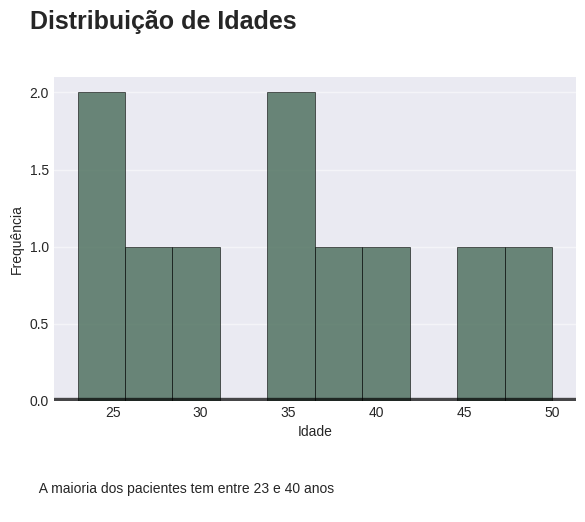

In [ ]:
# @title MATPLOTLIB - Histograma de Idade
# Configurar dimensão e estilo do gráfico
fig, ax = plt.subplots(figsize=(6, 4))
#plt.style.use('fivethirtyeight')

# Título
fig.text(0.04, 1,'Distribuição de Idades', fontsize=18, fontweight='bold')

# Histograma
plt.hist(df_1['age'], bins=10, edgecolor='black', color='#476B58', alpha=0.8)

# Configurar as bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Inserindo linha horizontal no eixo y=0
ax.axhline(y=0, color='black', linewidth=5.3, alpha=0.7)

# Configurar grid apenas no eixo y
ax.grid(axis='y', linestyle='-', alpha=0.5)
ax.grid(axis='x', alpha=0)

# Configurar as etiquetas
ax.set_xlabel('Idade', size=10)
ax.set_ylabel('Frequência', size=10)

plt.yticks(np.arange(0, 2.5, 0.5), fontsize=10)
plt.xticks(fontsize=10)

# Descrever o gráfico
fig.text(
    0.03, -0.2,
    '''
    A maioria dos pacientes tem entre 23 e 40 anos
    ''',
    fontsize=10, fontweight='light'
)

plt.show()

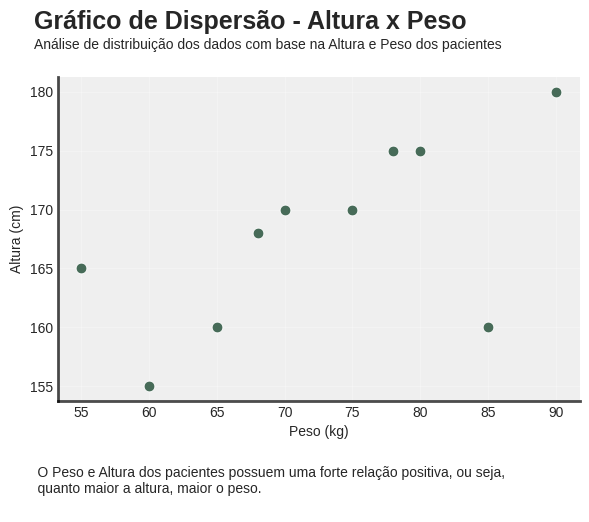

In [ ]:
# @title SEABORN - Gráfico de Dispersão - Altura x Peso
# Configurar dimensão e estilo do gráfico
fig, ax = plt.subplots(figsize=(6, 4))

# Título
fig.text(0.04, 1,'Gráfico de Dispersão - Altura x Peso', fontsize=18, fontweight='bold')
fig.text(0.04, 0.95,'Análise de distribuição dos dados com base na Altura e Peso dos pacientes', fontsize=10, fontweight='light')

# Gráfico de Dispersão
sns.scatterplot(data=df_1, x='weight', y='height', color='#476B58', s=60)

ax.set_facecolor('#EFEFEF')

# Configurando as bordas
for i in ['top','right']:
    ax.spines[i].set_visible(False)

for s in ['bottom','left']:
    ax.spines[s].set_color('black')
    ax.spines[s].set_alpha(0.7)
    ax.spines[s].set_linewidth(2)

# Configurar grid do eixo x e y
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.grid(axis='x', linestyle='-', alpha=0.3)

# Configurar as etiquetas
ax.set_xlabel('Peso (kg)', size=10)
ax.set_ylabel('Altura (cm)', size=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Descrever o gráfico
fig.text(
    0.02, -0.2,
    '''
    O Peso e Altura dos pacientes possuem uma forte relação positiva, ou seja,
    quanto maior a altura, maior o peso.
    ''',
    fontsize=10, fontweight='light'
)

plt.show()


In [ ]:
# @title PLOTLY - Gráfico de Barras - Gênero
# Renomeando a etiqueta de gênero
df_1['gender'] = df_1['gender'].replace({'M': 'Masculino', 'F': 'Feminino'})

# Contando o número de indivíduos por gênero
gender_counts = df_1['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Criando o gráfico de barras interativo
fig = px.bar(
    gender_counts,
    x='gender',
    y='count',
    labels={'gender': 'Gênero', 'count': 'Contagem'},
    color='gender',  # Adiciona cor com base no gênero
    text='count',    # Adiciona o valor de contagem como texto nas barras
    template='presentation'  # Usando um template limpo
)

# Atualizando o layout para melhorar a aparência
fig.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Quantidade',
    title={
        'text': 'Indivíduos por Gênero',
        'y':0.9,
        'x':0.5,
        'xanchor': 'right',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'family': 'Arial',
            'color': 'black'
        }
    },
    font=dict(size=14),
    bargap=0.1,  # Espaçamento entre as barras
    width=600,
    height=400
)

# Mostrando o gráfico
fig.show()

### Desafio Prático 2: Séries Temporais

Este desafio tem por objetivo realizar uma análise de série temporal de dados de vendas demonstrando através de gráficos as vendas ao longo do tempo, identificando tendências e sazonalidades.

**Dicionário de dados:**

- **date:** Data
- **sales:** Vendas

In [ ]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/adhalya/data_visualization/main/Arquivos%20de%20Dados/vendas.csv')
df_2.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
df_2['date'] = pd.to_datetime(df_2['date'])

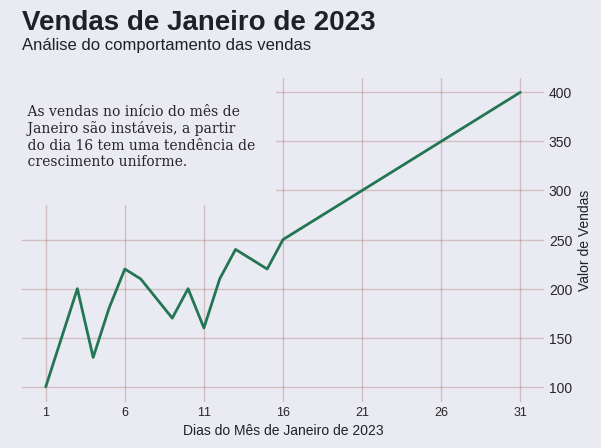

In [ ]:
# @title MATPLOTLIB - Gráfico de Linhas - Vendas ao longo do Tempo

# # Configurar dimensão e estilo do gráfico
# Configurar dimensão e estilo do gráfico
fig, ax = plt.subplots(figsize=(6, 4))
plt.style.use('seaborn-v0_8-darkgrid')
fig.patch.set_facecolor('#EAEAF2')
ax.set_facecolor('#EAEAF2')

# Título e subtítulo]
fig.text(0.08, 1,'Vendas de Janeiro de 2023', color='#1F2124', fontsize=20, fontweight='bold')
fig.text(0.08, 0.95,'Análise do comportamento das vendas', color='#1F2124', fontsize=12, fontweight='light')

# Gráfico de linhas
plt.plot(df_2['date'].dt.day, df_2['sales'], color='#237653', linewidth=2)

# Retirando todas as bordas
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

# Ajustando as datas aparentes nas etiquetas
plt.xticks(fontsize=9, ticks=np.arange(1, 32, 5))
ax.set_xlabel('Dias do Mês de Janeiro de 2023', fontsize=10, color='#1F2124')

# Configurando a posição do rótulo do eixo y à direita
ax.yaxis.set_label_position('right')
ax.set_ylabel('Valor de Vendas', fontsize=10, color='#1F2124')

# Posicionando etiquetas verticais na direita do gráfico
ax.yaxis.tick_right()
plt.yticks(fontsize=10)

# Configurar grid do eixo x e y
ax.grid(axis='y', linestyle='-', color='#9D5A4E', alpha=0.3)
ax.grid(axis='x', linestyle='-', color='#9D5A4E', alpha=0.3)

# Insight do gráfico
fig.text(
    0.06, 0.62,
    '''
    As vendas no início do mês de
    Janeiro são instáveis, a partir
    do dia 16 tem uma tendência de
    crescimento uniforme.
    ''',
    fontsize=10, fontweight='light', fontfamily='serif',
    bbox=dict(facecolor='#EAEAF2', alpha=1, edgecolor='none', pad=15)
);

plt.show()

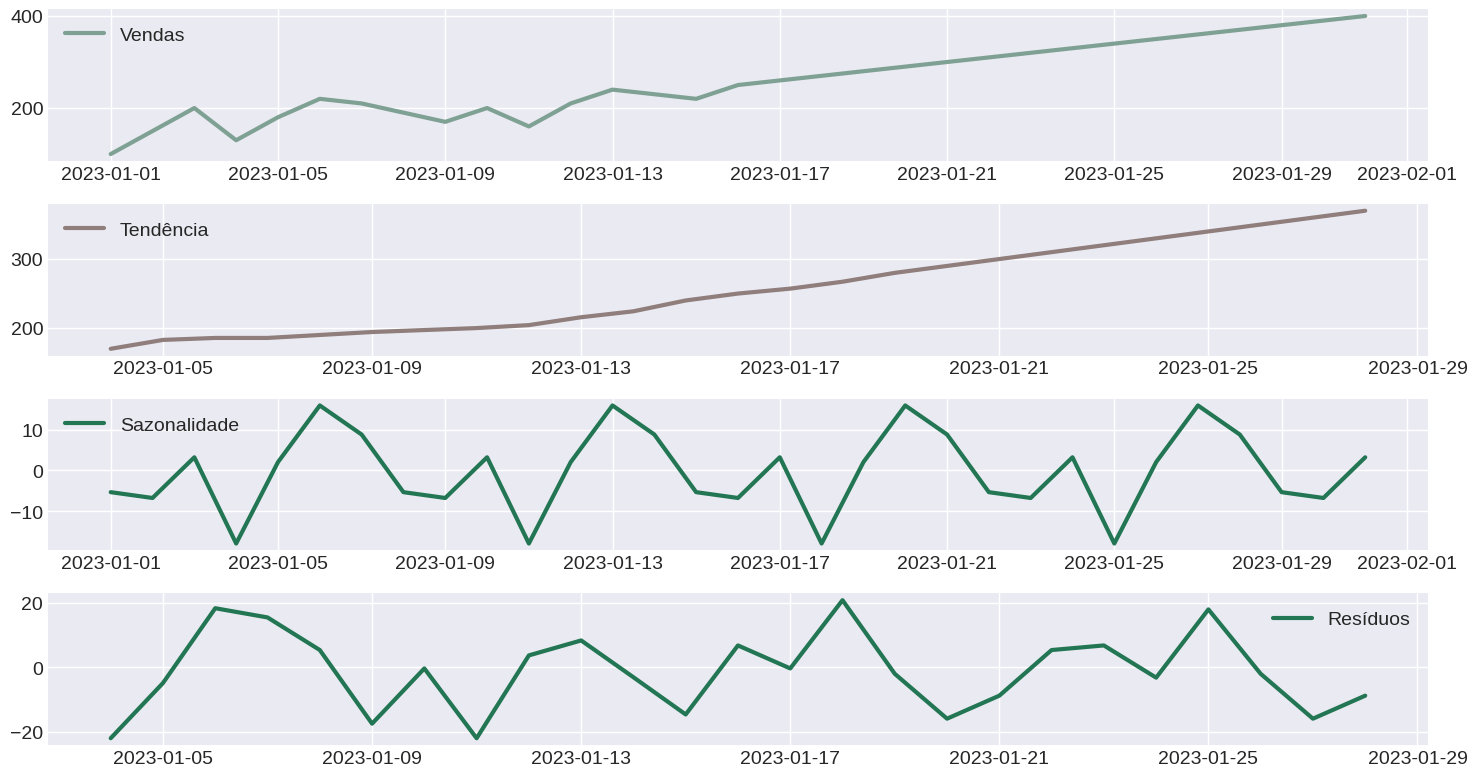

In [ ]:
# @title SEABORN - Gráfico de Decomposição Sazonal

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Por algum motivo estava danto erro para reconhecer a data transformada nos códigos acima, então precisei rodar neste bloco de código
if 'date' not in df_2.columns:
  df_2 = pd.read_csv('https://raw.githubusercontent.com/adhalya/data_visualization/main/Arquivos%20de%20Dados/vendas.csv')
  df_2['date'] = pd.to_datetime(df_2['date'])

# Transformando data em índice
df_2.set_index('date', inplace=True)

# Decomposição sazonal usando statsmodels
decomposition = seasonal_decompose(df_2['sales'], model='additive')

# Configurando dimensões do gráfico
plt.figure(figsize=(15, 8))
plt.style.use('seaborn-v0_8-darkgrid')


# Plotagem da decomposição
plt.subplot(411)
plt.plot(df_2.index, df_2['sales'], label='Vendas', color='#7FA194', linewidth=3)
plt.legend()

plt.subplot(412)
plt.plot(df_2.index, decomposition.trend, label='Tendência', color='#8F7E7B', linewidth=3)
plt.legend()

plt.subplot(413)
plt.plot(df_2.index, decomposition.seasonal, label='Sazonalidade', color='#237653', linewidth=3)
plt.legend()

plt.subplot(414)
plt.plot(df_2.index, decomposition.resid, label='Resíduos', color='#237653', linewidth=3)
plt.legend()

# Ajustes de layout e exibição do gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_2.head()

,sales
date,
2023-01-01,100
2023-01-02,150
2023-01-03,200
2023-01-04,130
2023-01-05,180


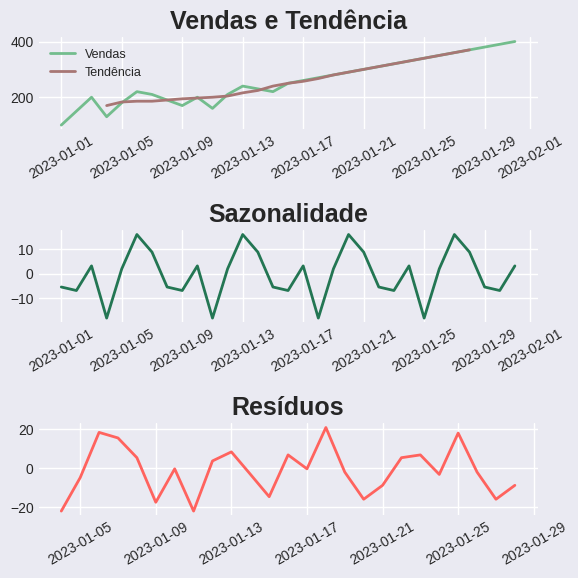

In [168]:
# Create a figure with three subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(6, 6))

# Apply the Seaborn darkgrid style and set background color
plt.style.use('seaborn-v0_8-darkgrid')
fig.patch.set_facecolor('#EAEAF2')

# Plot the sales data and trend on the first subplot
axes[0].plot(df_2.index, df_2['sales'], label='Vendas', color='#73BD8D', linewidth=2)
axes[0].plot(df_2.index, decomposition.trend, label='Tendência', color='#A77674', linewidth=2)
axes[0].set_title('Vendas e Tendência', fontsize=18, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].tick_params(axis='x', rotation=30)
axes[0].tick_params(axis='both', labelsize=10)

# Plot the seasonality on the second subplot
axes[1].plot(df_2.index, decomposition.seasonal, color='#237653', linewidth=2)
axes[1].set_title('Sazonalidade', fontsize=18, fontweight='bold')
axes[1].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='both', labelsize=10)

# Plot the residuals on the third subplot
axes[2].plot(df_2.index, decomposition.resid, color='#FF635E', linewidth=2)
axes[2].set_title('Resíduos', fontsize=18, fontweight='bold')
axes[2].tick_params(axis='x', rotation=30)
axes[2].tick_params(axis='both', labelsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
